Final Project:Boston House price prediction


 Here are the first few clues from our case file:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

 Checking for smudged or missing clues.
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

 All cleaned up! No more missing clues.


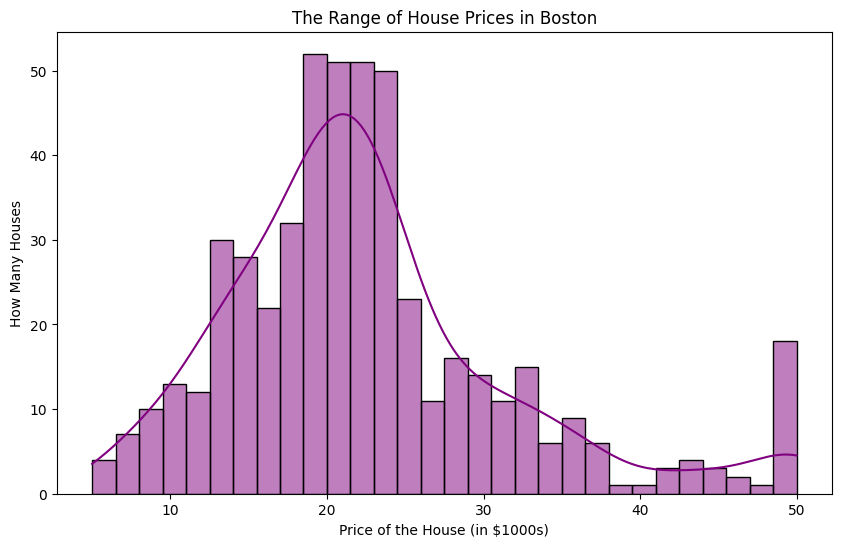

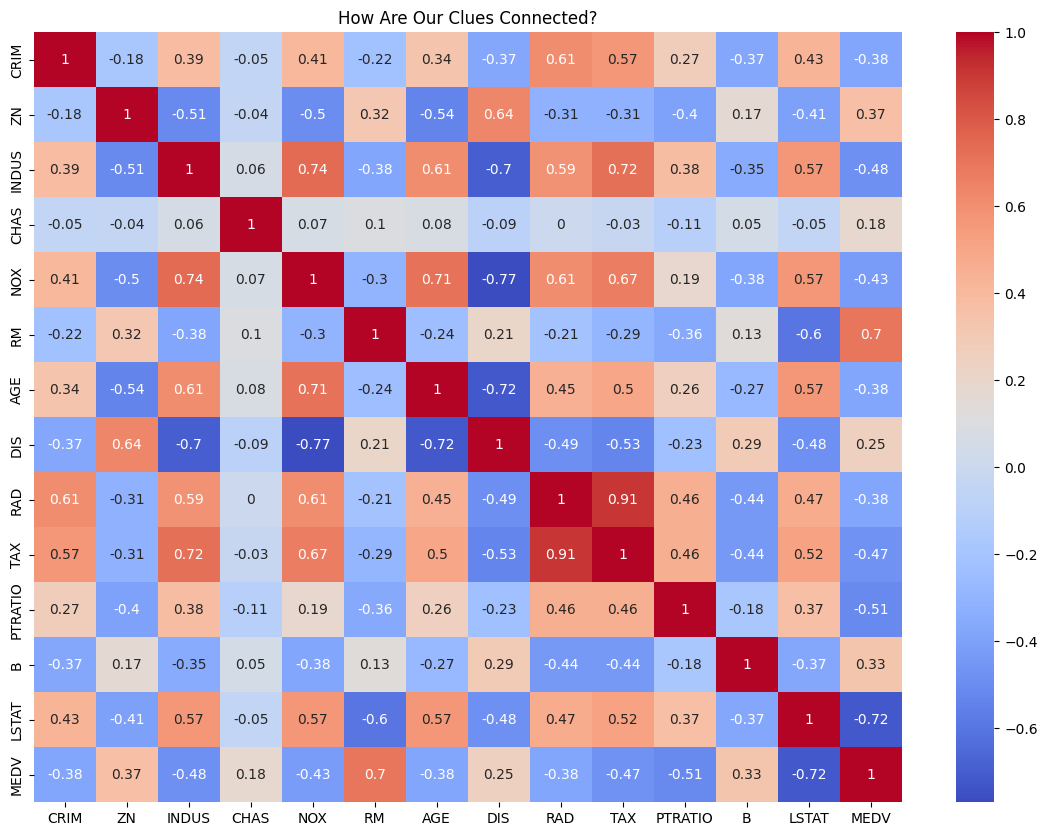


 Our crystal ball has studied the data and is ready for the exam!

 The Results Are In!
R-squared Score: 0.66
This means our model can explain about 66% of the differences in house prices. That's a solid B grade!


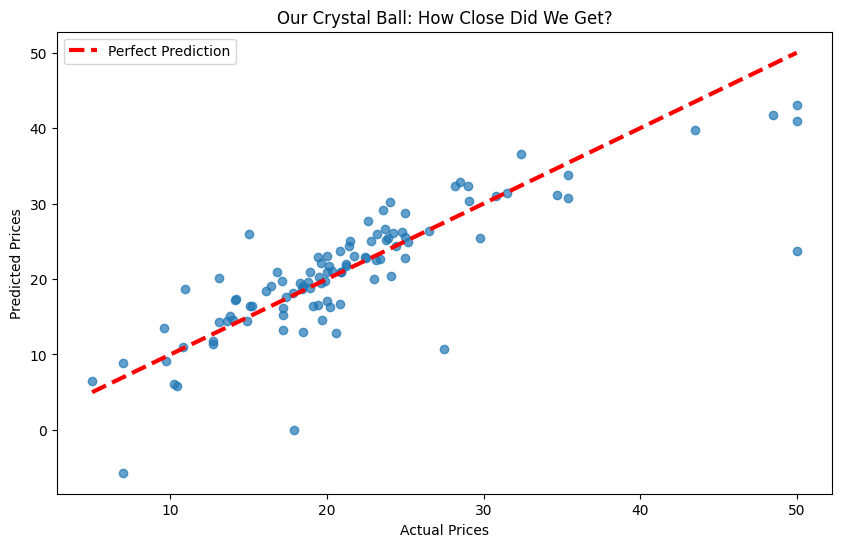

In [6]:

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 


try:
    df = pd.read_csv('HousingData.csv')
    print("\n Here are the first few clues from our case file:")
    print(df.head())
except FileNotFoundError:
    print("\n Error: 'HousingData.csv' not found. Make sure it's in the same folder!")
    exit()

print("\n Checking for smudged or missing clues.")
print(df.isnull().sum())


for col in df.columns[df.isnull().any()]:
    df[col] = df[col].fillna(df[col].mean())

print("\n All cleaned up! No more missing clues.")

plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='purple')
plt.title('The Range of House Prices in Boston')
plt.xlabel('Price of the House (in $1000s)')
plt.ylabel('How Many Houses')
plt.show()

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('How Are Our Clues Connected?')
plt.show()

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("\n Our crystal ball has studied the data and is ready for the exam!")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("\n The Results Are In!")
print(f"R-squared Score: {r2:.2f}")
print(f"This means our model can explain about {r2*100:.0f}% of the differences in house prices. That's a solid B grade!")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3, color='red', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Our Crystal Ball: How Close Did We Get?')
plt.legend()
plt.show()
